In [1]:
import findspark
findspark.init("C:\\spark")

In [134]:
import pyspark
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

# Configurasyon ve Spark Bağlantısı 

In [3]:
from pyspark import SparkContext
sc = SparkContext()

In [4]:
sc.version

'3.0.3'

In [5]:
sc.sparkUser()

'fatih'

In [6]:
sc.appName

'pyspark-shell'

In [7]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_assert_on_driver',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addFile',
 'addPyFile',
 'appName',
 'applicationId',
 'binaryFiles',
 'bina

In [8]:
sc.stop()

In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()



sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_uygulama>

# Functions

## head-show

In [4]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
pandas_df = pd.DataFrame(data=data.data, columns=data.feature_names).iloc[:,:4]
pandas_df.head()

,age,sex,bmi,bp
0,0.038076,0.050680,0.061696,0.021872
1,-0.001882,-0.044642,-0.051474,-0.026328
2,0.085299,0.050680,0.044451,-0.005671
3,-0.089063,-0.044642,-0.011595,-0.036656
4,0.005383,-0.044642,-0.036385,0.021872


In [5]:
spark_df = spark.read.csv(".\\PySpark_Diabetes\\diabetes.csv", header = True, inferSchema = True)
spark_df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



## dtypes

In [75]:
pandas_df.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
dtype: object

In [76]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

## info-printSchema

In [77]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
dtypes: float64(4)
memory usage: 13.9 KB


In [78]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



## type

In [79]:
type(pandas_df)

pandas.core.frame.DataFrame

In [80]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

## cache

In [81]:
spark_df.cache()

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

## toPandas

In [82]:
spark_df.toPandas().head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Convert Pandas to PySpark DataFrame

In [86]:
spark.createDataFrame(pandas_df).show(5)

+--------------------+------------------+-------------------+--------------------+
|                 age|               sex|                bmi|                  bp|
+--------------------+------------------+-------------------+--------------------+
|  0.0380759064334241|0.0506801187398187| 0.0616962065186885|  0.0218723549949558|
|-0.00188201652779104|-0.044641636506989|-0.0514740612388061| -0.0263278347173518|
|  0.0852989062966783|0.0506801187398187| 0.0444512133365941|-0.00567061055493425|
| -0.0890629393522603|-0.044641636506989|-0.0115950145052127| -0.0366564467985606|
| 0.00538306037424807|-0.044641636506989|-0.0363846922044735|  0.0218723549949558|
+--------------------+------------------+-------------------+--------------------+
only showing top 5 rows



In [87]:
spark_df.head(5)
# or
# spark_df.collect()[:5]

[Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1),
 Row(Pregnancies=1, Glucose=85, BloodPressure=66, SkinThickness=29, Insulin=0, BMI=26.6, DiabetesPedigreeFunction=0.351, Age=31, Outcome=0),
 Row(Pregnancies=8, Glucose=183, BloodPressure=64, SkinThickness=0, Insulin=0, BMI=23.3, DiabetesPedigreeFunction=0.672, Age=32, Outcome=1),
 Row(Pregnancies=1, Glucose=89, BloodPressure=66, SkinThickness=23, Insulin=94, BMI=28.1, DiabetesPedigreeFunction=0.167, Age=21, Outcome=0),
 Row(Pregnancies=0, Glucose=137, BloodPressure=40, SkinThickness=35, Insulin=168, BMI=43.1, DiabetesPedigreeFunction=2.288, Age=33, Outcome=1)]

## shape

In [99]:
pandas_df.shape

(442, 4)

In [98]:
(spark_df.count(), len(spark_df.columns))

(768, 9)

In [100]:
pandas_df.ndim

2

## len-count

In [107]:
len(pandas_df)

442

In [103]:
spark_df.count()

768

## describe

In [110]:
pandas_df.describe()

,age,sex,bmi,bp
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01


In [116]:
spark_df.describe().toPandas()

,summary,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,count,768,768,768,768,768,768,768,768,768
1,mean,3.8450520833333335,120.89453125,69.10546875,20.536458333333332,79.79947916666667,31.992578124999977,0.4718763020833327,33.240885416666664,0.3489583333333333
2,stddev,3.36957806269887,31.97261819513622,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.476951377242799
3,min,0,0,0,0,0,0.0,0.078,21,0
4,max,17,199,122,99,846,67.1,2.42,81,1


In [120]:
pandas_df.age.describe()

count    4.420000e+02
mean    -3.634285e-16
std      4.761905e-02
min     -1.072256e-01
25%     -3.729927e-02
50%      5.383060e-03
75%      3.807591e-02
max      1.107267e-01
Name: age, dtype: float64

In [122]:
spark_df.describe("Glucose").show()

+-------+-----------------+
|summary|          Glucose|
+-------+-----------------+
|  count|              768|
|   mean|     120.89453125|
| stddev|31.97261819513622|
|    min|                0|
|    max|              199|
+-------+-----------------+



## Select variables

In [124]:
pandas_df[["age",'bmi']].head(5)

,age,bmi
0,0.038076,0.061696
1,-0.001882,-0.051474
2,0.085299,0.044451
3,-0.089063,-0.011595
4,0.005383,-0.036385


In [123]:
spark_df.select("Glucose","Pregnancies").show(5)

+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
|    183|          8|
|     89|          1|
|    137|          0|
+-------+-----------+
only showing top 5 rows



## nunique-distinct

In [126]:
pandas_df.age.nunique()

58

In [125]:
spark_df.select("Glucose").distinct().count()

136

## duplicated().sum() - dropDuplicates().count()

In [133]:
pandas_df.duplicated().sum()

0

In [145]:
pandas_df.age.duplicated().sum()

384

In [157]:
spark_df.select().dropDuplicates().count()

1

In [156]:
spark_df.select("Glucose").dropDuplicates().count()

136

## drop_duplicates-dropDuplicates

In [148]:
pandas_df.drop_duplicates(inplace=True)

In [155]:
spark_df = spark_df.select().dropDuplicates()

In [158]:
spark_df = spark_df.select("Glucose").dropDuplicates()

## pd.crosstab - crosstab

In [170]:
pd.crosstab(pandas_df.sex, pandas_df.age)

age,-0.107226,-0.103593,-0.099961,-0.096328,-0.092695,-0.089063,-0.085430,-0.081798,-0.078165,-0.074533,...,0.067136,0.070769,0.074401,0.078034,0.081666,0.085299,0.088931,0.092564,0.096197,0.110727
sex,,,,,,,,,,,,,,,,,,,,,
-0.044642,3,1,2,4,3,3,2,1,3,4,...,5,3,5,0,1,0,1,1,2,0
0.050680,0,2,0,0,1,0,3,1,1,4,...,8,4,1,1,4,1,0,0,0,2


In [165]:
spark_df.crosstab("Outcome","Pregnancies").show()

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



## dropna

In [178]:
pandas_df.dropna().head(5)

,age,sex,bmi,bp
0,0.038076,0.050680,0.061696,0.021872
1,-0.001882,-0.044642,-0.051474,-0.026328
2,0.085299,0.050680,0.044451,-0.005671
3,-0.089063,-0.044642,-0.011595,-0.036656
4,0.005383,-0.044642,-0.036385,0.021872


In [176]:
spark_df.dropna().show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



## isna().sum() - isnan

In [188]:
pandas_df.isna().sum()

age    0
sex    0
bmi    0
bp     0
dtype: int64

In [184]:
from pyspark.sql.functions import col,isnan, when, count
spark_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in spark_df.columns]).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|          0|      0|            0|            0|      0|  0|                       0|  0|      0|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



## where - filter

In [200]:
pandas_df[pandas_df.age>0.1]
# or
# pandas_df.where(pandas_df.age>0.1).dropna()

,age,sex,bmi,bp
204,0.110727,0.05068,0.006728,0.028758
402,0.110727,0.05068,-0.033151,-0.022885


In [209]:
spark_df.filter(spark_df.Age >40).show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          2|    197|           70|           45|    543|30.5|                   0.158| 53|      1|
|          8|    125|           96|            0|      0| 0.0|                   0.232| 54|      1|
|         10|    139|           80|            0|      0|27.1|                   1.441| 57|      0|
|          1|    189|           60|           23|    846|30.1|                   0.398| 59|      1|
|          5|    166|           72|           19|    175|25.8|                   0.587| 51|      1|
|          8|     99|           84|            0|      0|35.4|                   0.388| 50|      0|


## value_counts - groupby().count().show()

In [211]:
pandas_df.sex.value_counts()
# or
# pandas_df.groupby('sex').size()

-0.044642    235
 0.050680    207
Name: sex, dtype: int64

In [210]:
spark_df.groupby("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



## groupby().agg()

In [217]:
pandas_df.groupby("sex").agg({"bmi": "mean"})

# or
# pandas_df.groupby("sex")["bmi"].mean()

,bmi
sex,
-0.044642,-0.003936
0.050680,0.004468


In [212]:
spark_df.groupby("Outcome").agg({"BMI": "mean"}).show()

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



## Add new column

In [228]:
pandas_df['yeni_degisken']=pandas_df.age*1000
pandas_df.head(5)

,age,sex,bmi,bp,yeni_degisken
0,0.038076,0.050680,0.061696,0.021872,38.075906
1,-0.001882,-0.044642,-0.051474,-0.026328,-1.882017
2,0.085299,0.050680,0.044451,-0.005671,85.298906
3,-0.089063,-0.044642,-0.011595,-0.036656,-89.062939
4,0.005383,-0.044642,-0.036385,0.021872,5.383060


In [221]:
spark_df.withColumn("yeni_degisken", spark_df.BMI / 2).show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|yeni_degisken|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|         16.8|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|         13.3|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|        11.65|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|        14.05|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|        21.55|
+-----------+-------+-------------+-------------+-------+----+------------------------+-

## rename - withColumnRenamed

In [245]:
pandas_df.rename(columns={"yeni_degisken":"new_variable"}).head()

,age,sex,bmi,bp,new_variable
0,0.038076,0.050680,0.061696,0.021872,38.075906
1,-0.001882,-0.044642,-0.051474,-0.026328,-1.882017
2,0.085299,0.050680,0.044451,-0.005671,85.298906
3,-0.089063,-0.044642,-0.011595,-0.036656,-89.062939
4,0.005383,-0.044642,-0.036385,0.021872,5.383060


In [239]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|bagimli_degisken|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|               1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|               0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|               1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|               0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|               1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
only showing top 5 

## drop columns

In [252]:
pandas_df.drop(columns=['age','sex'])

,bmi,bp,yeni_degisken
0,0.061696,0.021872,38.075906
1,-0.051474,-0.026328,-1.882017
2,0.044451,-0.005671,85.298906
3,-0.011595,-0.036656,-89.062939
4,-0.036385,0.021872,5.383060
...,...,...,...
437,0.019662,0.059744,41.708445
438,-0.015906,-0.067642,-5.514555
439,-0.015906,0.017282,41.708445
440,0.039062,0.001215,-45.472478


In [253]:
spark_df.drop("Pregnancies","Glucose").show(5)

+-------------+-------------+-------+----+------------------------+---+-------+
|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-------------+-------------+-------+----+------------------------+---+-------+
|           72|           35|      0|33.6|                   0.627| 50|      1|
|           66|           29|      0|26.6|                   0.351| 31|      0|
|           64|            0|      0|23.3|                   0.672| 32|      1|
|           66|           23|     94|28.1|                   0.167| 21|      0|
|           40|           35|    168|43.1|                   2.288| 33|      1|
+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



## columns

In [254]:
pandas_df.columns

Index(['age', 'sex', 'bmi', 'bp', 'yeni_degisken'], dtype='object')

In [354]:
spark_df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## columns rename - toDF

In [353]:
pandas_df.columns= [col.title() for col in pandas_df.columns]
pandas_df.columns

Index(['Age', 'Sex', 'Bmi', 'Bp', 'Yeni_Degisken'], dtype='object')

In [363]:
spark_df = spark_df.toDF(*[col.lower() for col in spark_df.columns])
spark_df.columns

['pregnancies',
 'glucose',
 'bloodpressure',
 'skinthickness',
 'insulin',
 'bmi',
 'diabetespedigreefunction',
 'age',
 'outcome']

## where,select - loc

In [378]:
pandas_df.loc[pandas_df[pandas_df.Age==0.0380759064334241].index,'Bmi']

0      0.061696
68    -0.029918
109   -0.009439
209   -0.018062
271    0.008883
279   -0.024529
299   -0.013751
347   -0.029918
359    0.005650
421    0.016428
Name: Bmi, dtype: float64

In [381]:
spark_df.where(spark_df.insulin == 168).select("insulin","bmi").show()

+-------+----+
|insulin| bmi|
+-------+----+
|    168|43.1|
|    168|29.7|
|    168|25.6|
|    168|33.6|
+-------+----+



## Change Column Type (astype - cast)

In [31]:
pandas_df.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
dtype: object

In [32]:
pandas_df.astype({'age': 'int32', 'sex':'string'}).dtypes

age      int32
sex     string
bmi    float64
bp     float64
dtype: object

In [28]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [29]:
spark_df2 = spark_df.withColumn("DiabetesPedigreeFunction",spark_df['DiabetesPedigreeFunction'].cast("string")) \
                    .withColumn("Age",spark_df['Age'].cast("double")) \
                    .withColumn("Outcome",spark_df["Outcome"].cast('boolean'))
spark_df2.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'string'),
 ('Age', 'double'),
 ('Outcome', 'boolean')]

## Replace Null values with median

In [105]:
data = np.array([(1, 'John', 1.79, 28,'M', 'Doctor'),
                (2, 'Steve', 1.78, 45,'M', None),
                (3, 'Emma', 1.75, None, None, None),
                (4, 'Ashley',1.6, 33,'F', 'Analyst'),
                (5, 'Olivia', 1.8, 54,'F', 'Teacher'),
                (6, 'Hannah', 1.82, None, 'F', None),
                (7, 'William',None, 42,'M', 'Engineer'),
                (None,None,None,None,None,None),
                (8,'Ethan',1.55,38,'M','Doctor'),
                (9,'Hannah',1.65,None,'F','Doctor'),
               (10,'Xavier',1.64,43,None,'Doctor'),
               ('Id', 'Name', 'Height', 'Age', 'Gender', 'Profession')])

pdf = pd.DataFrame(data[:-1], columns=data[:][-1])
pdf

,Id,Name,Height,Age,Gender,Profession
0,1,John,1.79,28,M,Doctor
1,2,Steve,1.78,45,M,None
2,3,Emma,1.75,None,None,None
3,4,Ashley,1.6,33,F,Analyst
4,5,Olivia,1.8,54,F,Teacher
5,6,Hannah,1.82,None,F,None
6,7,William,None,42,M,Engineer
7,None,None,None,None,None,None
8,8,Ethan,1.55,38,M,Doctor
9,9,Hannah,1.65,None,F,Doctor


In [108]:
pdf.isna().sum()

Id            1
Name          1
Height        2
Age           4
Gender        3
Profession    4
dtype: int64

In [110]:
pdf[['Height','Age']] = pdf[['Height','Age']].astype('float64').fillna(pdf[['Height','Age']].median())
pdf

,Id,Name,Height,Age,Gender,Profession
0,1,John,1.79,28.0,M,Doctor
1,2,Steve,1.78,45.0,M,None
2,3,Emma,1.75,42.0,None,None
3,4,Ashley,1.60,33.0,F,Analyst
4,5,Olivia,1.80,54.0,F,Teacher
5,6,Hannah,1.82,42.0,F,None
6,7,William,1.75,42.0,M,Engineer
7,None,None,1.75,42.0,None,None
8,8,Ethan,1.55,38.0,M,Doctor
9,9,Hannah,1.65,42.0,F,Doctor


In [111]:
pdf.isna().sum()

Id            1
Name          1
Height        0
Age           0
Gender        3
Profession    4
dtype: int64

In [36]:
sdf = spark.createDataFrame([(1, 'John', 1.79, 28,'M', 'Doctor'),
                        (2, 'Steve', 1.78, 45,'M', None),
                        (3, 'Emma', 1.75, None, None, None),
                        (4, 'Ashley',1.6, 33,'F', 'Analyst'),
                        (5, 'Olivia', 1.8, 54,'F', 'Teacher'),
                        (6, 'Hannah', 1.82, None, 'F', None),
                        (7, 'William',None, 42,'M', 'Engineer'),
                        (None,None,None,None,None,None),
                        (8,'Ethan',1.55,38,'M','Doctor'),
                        (9,'Hannah',1.65,None,'F','Doctor'),
                       (10,'Xavier',1.64,43,None,'Doctor')]
                       , ['Id', 'Name', 'Height', 'Age', 'Gender', 'Profession'])
sdf.show()

+----+-------+------+----+------+----------+
|  Id|   Name|Height| Age|Gender|Profession|
+----+-------+------+----+------+----------+
|   1|   John|  1.79|  28|     M|    Doctor|
|   2|  Steve|  1.78|  45|     M|      null|
|   3|   Emma|  1.75|null|  null|      null|
|   4| Ashley|   1.6|  33|     F|   Analyst|
|   5| Olivia|   1.8|  54|     F|   Teacher|
|   6| Hannah|  1.82|null|     F|      null|
|   7|William|  null|  42|     M|  Engineer|
|null|   null|  null|null|  null|      null|
|   8|  Ethan|  1.55|  38|     M|    Doctor|
|   9| Hannah|  1.65|null|     F|    Doctor|
|  10| Xavier|  1.64|  43|  null|    Doctor|
+----+-------+------+----+------+----------+



In [37]:
# check null values
from pyspark.sql.functions import col,isnan, when, count
sdf.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in sdf.columns]).show()

+---+----+------+---+------+----------+
| Id|Name|Height|Age|Gender|Profession|
+---+----+------+---+------+----------+
|  1|   1|     2|  4|     3|         4|
+---+----+------+---+------+----------+



In [43]:
# Column Name must be of type numeric

from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['Height','Age'], 
    outputCols=["{}_imputed".format(c) for c in ['Height','Age']]
    ).setStrategy("median")

# Add imputation cols at the end of the dataframe
sdf = imputer.fit(sdf).transform(sdf)
sdf.show()

+----+-------+------+----+------+----------+--------------+-----------+
|  Id|   Name|Height| Age|Gender|Profession|Height_imputed|Age_imputed|
+----+-------+------+----+------+----------+--------------+-----------+
|   1|   John|  1.79|  28|     M|    Doctor|          1.79|         28|
|   2|  Steve|  1.78|  45|     M|      null|          1.78|         45|
|   3|   Emma|  1.75|null|  null|      null|          1.75|         42|
|   4| Ashley|   1.6|  33|     F|   Analyst|           1.6|         33|
|   5| Olivia|   1.8|  54|     F|   Teacher|           1.8|         54|
|   6| Hannah|  1.82|null|     F|      null|          1.82|         42|
|   7|William|  null|  42|     M|  Engineer|          1.75|         42|
|null|   null|  null|null|  null|      null|          1.75|         42|
|   8|  Ethan|  1.55|  38|     M|    Doctor|          1.55|         38|
|   9| Hannah|  1.65|null|     F|    Doctor|          1.65|         42|
|  10| Xavier|  1.64|  43|  null|    Doctor|          1.64|     

In [42]:
# check null values
from pyspark.sql.functions import col,isnan, when, count
sdf.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in sdf.columns]).show()

+---+----+------+---+------+----------+--------------+-----------+
| Id|Name|Height|Age|Gender|Profession|Height_imputed|Age_imputed|
+---+----+------+---+------+----------+--------------+-----------+
|  1|   1|     2|  4|     3|         4|             0|          0|
+---+----+------+---+------+----------+--------------+-----------+



## Label Encoding & One Hot Encoding

In [152]:
pdf

,Id,Name,Height,Age,Gender,Profession
0,1,John,1.79,28.0,M,Doctor
1,2,Steve,1.78,45.0,M,None
2,3,Emma,1.75,42.0,None,None
3,4,Ashley,1.60,33.0,F,Analyst
4,5,Olivia,1.80,54.0,F,Teacher
5,6,Hannah,1.82,42.0,F,None
6,7,William,1.75,42.0,M,Engineer
7,None,None,1.75,42.0,None,None
8,8,Ethan,1.55,38.0,M,Doctor
9,9,Hannah,1.65,42.0,F,Doctor


In [153]:
# Drop missing values
pdf1 = pdf.dropna(subset=['Gender', 'Profession'])

In [154]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encode_cols = ['Gender','Profession']
pdf1[[f"{col}_index" for col in label_encode_cols]] = pdf1[label_encode_cols].apply(LabelEncoder().fit_transform)
pdf1

,Id,Name,Height,Age,Gender,Profession,Gender_index,Profession_index
0,1,John,1.79,28.0,M,Doctor,1,1
3,4,Ashley,1.60,33.0,F,Analyst,0,0
4,5,Olivia,1.80,54.0,F,Teacher,0,3
6,7,William,1.75,42.0,M,Engineer,1,2
8,8,Ethan,1.55,38.0,M,Doctor,1,1
9,9,Hannah,1.65,42.0,F,Doctor,0,1


In [161]:
# One Hot Encoding
pdf2 = pd.get_dummies(pdf, columns =  ['Gender','Profession'], drop_first=True)
pdf2

,Id,Name,Height,Age,Gender_M,Profession_Doctor,Profession_Engineer,Profession_Teacher
0,1,John,1.79,28.0,1,1,0,0
1,2,Steve,1.78,45.0,1,0,0,0
2,3,Emma,1.75,42.0,0,0,0,0
3,4,Ashley,1.60,33.0,0,0,0,0
4,5,Olivia,1.80,54.0,0,0,0,1
5,6,Hannah,1.82,42.0,0,0,0,0
6,7,William,1.75,42.0,1,0,1,0
7,None,None,1.75,42.0,0,0,0,0
8,8,Ethan,1.55,38.0,1,1,0,0
9,9,Hannah,1.65,42.0,0,1,0,0


In [197]:
# One Hot Encoding Alternative
# !pip install category_encoders
import category_encoders as ce

one_hot_encode_cols = ['Gender','Profession']
encoder_var=ce.OneHotEncoder(cols=one_hot_encode_cols, use_cat_names=True)
pdf3 = encoder_var.fit_transform(pdf1)
pdf3

,Id,Name,Height,Age,Gender_M,Gender_F,Profession_Doctor,Profession_Analyst,Profession_Teacher,Profession_Engineer,Gender_index,Profession_index
0,1,John,1.79,28.0,1,0,1,0,0,0,1,1
3,4,Ashley,1.60,33.0,0,1,0,1,0,0,0,0
4,5,Olivia,1.80,54.0,0,1,0,0,1,0,0,3
6,7,William,1.75,42.0,1,0,0,0,0,1,1,2
8,8,Ethan,1.55,38.0,1,0,1,0,0,0,1,1
9,9,Hannah,1.65,42.0,0,1,1,0,0,0,0,1


In [147]:
sdf.show(5)

+---+------+------+----+------+----------+--------------+-----------+
| Id|  Name|Height| Age|Gender|Profession|Height_imputed|Age_imputed|
+---+------+------+----+------+----------+--------------+-----------+
|  1|  John|  1.79|  28|     M|    Doctor|          1.79|         28|
|  2| Steve|  1.78|  45|     M|      null|          1.78|         45|
|  3|  Emma|  1.75|null|  null|      null|          1.75|         42|
|  4|Ashley|   1.6|  33|     F|   Analyst|           1.6|         33|
|  5|Olivia|   1.8|  54|     F|   Teacher|           1.8|         54|
+---+------+------+----+------+----------+--------------+-----------+
only showing top 5 rows



In [148]:
# Drop missing values
sdf1 = sdf.dropna(subset=('Gender', 'Profession'))
sdf1.show()

+---+-------+------+----+------+----------+--------------+-----------+
| Id|   Name|Height| Age|Gender|Profession|Height_imputed|Age_imputed|
+---+-------+------+----+------+----------+--------------+-----------+
|  1|   John|  1.79|  28|     M|    Doctor|          1.79|         28|
|  4| Ashley|   1.6|  33|     F|   Analyst|           1.6|         33|
|  5| Olivia|   1.8|  54|     F|   Teacher|           1.8|         54|
|  7|William|  null|  42|     M|  Engineer|          1.75|         42|
|  8|  Ethan|  1.55|  38|     M|    Doctor|          1.55|         38|
|  9| Hannah|  1.65|null|     F|    Doctor|          1.65|         42|
+---+-------+------+----+------+----------+--------------+-----------+



In [149]:
# Label Encoding

from pyspark.ml.feature import StringIndexer
gender_indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
Profession_indexer = StringIndexer(inputCol="Profession", outputCol="ProfessionIndex")
sdf1 = gender_indexer.fit(sdf1).transform(sdf1)
sdf1 = Profession_indexer.fit(sdf1).transform(sdf1)
sdf1.show()

+---+-------+------+----+------+----------+--------------+-----------+-----------+---------------+
| Id|   Name|Height| Age|Gender|Profession|Height_imputed|Age_imputed|GenderIndex|ProfessionIndex|
+---+-------+------+----+------+----------+--------------+-----------+-----------+---------------+
|  1|   John|  1.79|  28|     M|    Doctor|          1.79|         28|        1.0|            0.0|
|  4| Ashley|   1.6|  33|     F|   Analyst|           1.6|         33|        0.0|            1.0|
|  5| Olivia|   1.8|  54|     F|   Teacher|           1.8|         54|        0.0|            3.0|
|  7|William|  null|  42|     M|  Engineer|          1.75|         42|        1.0|            2.0|
|  8|  Ethan|  1.55|  38|     M|    Doctor|          1.55|         38|        1.0|            0.0|
|  9| Hannah|  1.65|null|     F|    Doctor|          1.65|         42|        0.0|            0.0|
+---+-------+------+----+------+----------+--------------+-----------+-----------+---------------+



OneHotEncoding yapmadan once mutlaka indexleme(label encoding) yapilmali. Indexleme ile numeric yapilmadan OneHotEncoding uygulanamaz.

In [150]:
# OneHotEncoding
from pyspark.ml.feature import OneHotEncoder

onehotencoder_gender_vector = OneHotEncoder(inputCol='GenderIndex',outputCol='Gender_vector')
onehotencoder_profession_vector = OneHotEncoder(inputCol='ProfessionIndex',outputCol='Profession_vector')
sdf2 = onehotencoder_gender_vector.fit(sdf1).transform(sdf1)
sdf2 = onehotencoder_profession_vector.fit(sdf2).transform(sdf2)
sdf2.show()

+---+-------+------+----+------+----------+--------------+-----------+-----------+---------------+-------------+-----------------+
| Id|   Name|Height| Age|Gender|Profession|Height_imputed|Age_imputed|GenderIndex|ProfessionIndex|Gender_vector|Profession_vector|
+---+-------+------+----+------+----------+--------------+-----------+-----------+---------------+-------------+-----------------+
|  1|   John|  1.79|  28|     M|    Doctor|          1.79|         28|        1.0|            0.0|    (1,[],[])|    (3,[0],[1.0])|
|  4| Ashley|   1.6|  33|     F|   Analyst|           1.6|         33|        0.0|            1.0|(1,[0],[1.0])|    (3,[1],[1.0])|
|  5| Olivia|   1.8|  54|     F|   Teacher|           1.8|         54|        0.0|            3.0|(1,[0],[1.0])|        (3,[],[])|
|  7|William|  null|  42|     M|  Engineer|          1.75|         42|        1.0|            2.0|    (1,[],[])|    (3,[2],[1.0])|
|  8|  Ethan|  1.55|  38|     M|    Doctor|          1.55|         38|        1.0| 

# SQL İşlemleri

## Pandas SQL

In [266]:
from sqlite3 import connect
conn = connect(':memory:')
pandas_df.to_sql('test_data', conn)

### quary-1

In [342]:
pandas_df[['age','sex']]

,age,sex
0,0.038076,0.050680
1,-0.001882,-0.044642
2,0.085299,0.050680
3,-0.089063,-0.044642
4,0.005383,-0.044642
...,...,...
437,0.041708,0.050680
438,-0.005515,0.050680
439,0.041708,0.050680
440,-0.045472,-0.044642


In [267]:
pd.read_sql('SELECT age, sex FROM test_data', conn)

,age,sex
0,0.038076,0.050680
1,-0.001882,-0.044642
2,0.085299,0.050680
3,-0.089063,-0.044642
4,0.005383,-0.044642
...,...,...
437,0.041708,0.050680
438,-0.005515,0.050680
439,0.041708,0.050680
440,-0.045472,-0.044642


### quary-2

In [270]:
pandas_df.groupby("sex").agg({"age": np.mean, "bmi": np.size})

,age,bmi
sex,,
-0.044642,-0.007756,235
0.050680,0.008805,207


In [278]:
query = """SELECT sex, AVG(age), COUNT(bmi)
            FROM test_data
            GROUP BY sex;"""

pd.read_sql(query, conn)

,sex,AVG(age),COUNT(bmi)
0,-0.044642,-0.007756,235
1,0.050680,0.008805,207


### quary-3

In [338]:
pandas_df[pandas_df.sex>0].sort_values('age', ascending=False)[:10]

,age,sex,bmi,bp,yeni_degisken
402,0.110727,0.05068,-0.033151,-0.022885,110.726675
204,0.110727,0.05068,0.006728,0.028758,110.726675
2,0.085299,0.05068,0.044451,-0.005671,85.298906
345,0.081666,0.05068,-0.002973,-0.033214,81.666368
414,0.081666,0.05068,0.006728,-0.004523,81.666368
331,0.081666,0.05068,-0.025607,-0.036656,81.666368
202,0.081666,0.05068,0.001339,0.035644,81.666368
258,0.078034,0.05068,-0.024529,-0.042395,78.033829
273,0.074401,0.05068,-0.020218,0.045972,74.401291
17,0.070769,0.05068,0.012117,0.056301,70.768752


In [341]:
query = """SELECT *
            FROM test_data
            WHERE sex > 0
            ORDER BY Age DESC
            LIMIT 10;"""

pd.read_sql(query, conn).set_index('index')

,age,sex,bmi,bp,yeni_degisken
index,,,,,
204,0.110727,0.05068,0.006728,0.028758,110.726675
402,0.110727,0.05068,-0.033151,-0.022885,110.726675
2,0.085299,0.05068,0.044451,-0.005671,85.298906
202,0.081666,0.05068,0.001339,0.035644,81.666368
331,0.081666,0.05068,-0.025607,-0.036656,81.666368
345,0.081666,0.05068,-0.002973,-0.033214,81.666368
414,0.081666,0.05068,0.006728,-0.004523,81.666368
258,0.078034,0.05068,-0.024529,-0.042395,78.033829
273,0.074401,0.05068,-0.020218,0.045972,74.401291


## PySpark SQL

In [258]:
spark_df.registerTempTable("table_df")

In [259]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [260]:
spark.sql("show tables").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        | table_df|       true|
+--------+---------+-----------+



### quary-1`

In [345]:
spark_df.select('Glucose').show(5)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [261]:
spark.sql("select Glucose from table_df").show(5)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



### quary-2

In [279]:
spark_df.groupby('Outcome').agg({"Glucose": "mean"}).show()

+-------+------------------+
|Outcome|      avg(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



In [280]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show()

+-------+------------------+
|Outcome|     mean(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



### quary-3

In [291]:
spark_df.groupby("Age").agg({"BloodPressure": "mean", "Outcome": "size"}).show(10)

+---+------------------+--------------+
|Age|avg(BloodPressure)|count(Outcome)|
+---+------------------+--------------+
| 31|            64.375|            24|
| 65| 78.66666666666667|             3|
| 53|              79.0|             5|
| 34|              74.0|            14|
| 81|              74.0|             1|
| 28| 68.31428571428572|            35|
| 26| 64.18181818181819|            33|
| 27|              73.5|            32|
| 44|             61.75|             8|
| 22| 63.72222222222222|            72|
+---+------------------+--------------+
only showing top 10 rows



In [293]:
query="""select Age, mean(BloodPressure), COUNT(Outcome)
from table_df 
group by Age"""

spark.sql(query).show(10)

+---+-------------------+--------------+
|Age|mean(BloodPressure)|count(Outcome)|
+---+-------------------+--------------+
| 31|             64.375|            24|
| 65|  78.66666666666667|             3|
| 53|               79.0|             5|
| 34|               74.0|            14|
| 81|               74.0|             1|
| 28|  68.31428571428572|            35|
| 26|  64.18181818181819|            33|
| 27|               73.5|            32|
| 44|              61.75|             8|
| 22|  63.72222222222222|            72|
+---+-------------------+--------------+
only showing top 10 rows



# Big Data Visualization

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

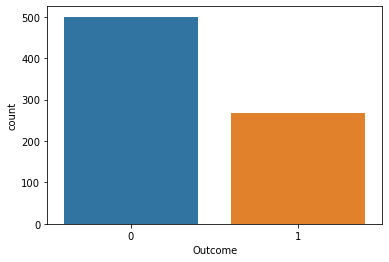

In [323]:
# Diabet hastalarinin frekasini goster
sdf = spark_df.toPandas()
sns.countplot(x = "Outcome", data = sdf);

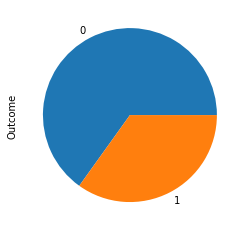

In [328]:
# Diabet hastalarinin oranini goster
sdf['Outcome'].value_counts().plot.pie();

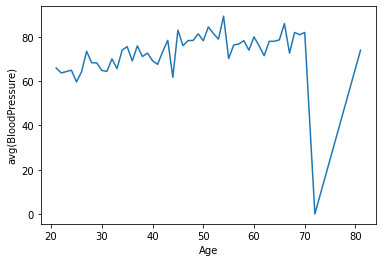

In [329]:
# Yasa gore kan basinci ortalamasini goster
sdf = spark_df.groupby("Age").agg({'BloodPressure':'mean'}).toPandas()
sns.lineplot(x = "Age", y = "avg(BloodPressure)", data = sdf);

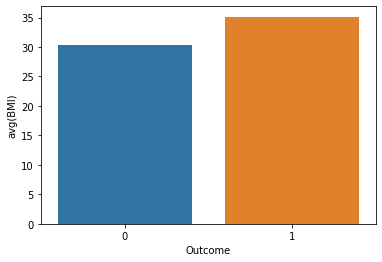

In [334]:
# Diyabet olup olmamasina gore BMI ortalamasini goster
sdf = spark_df.groupby("Outcome").agg({'BMI':'mean'}).toPandas()
sns.barplot(x = "Outcome", y = "avg(BMI)", data = sdf);